<a href="https://colab.research.google.com/github/omp72103/EARLY-LEUKEMIA-DETECTION-USING-ML/blob/main/PBL_MP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title Import the important data analysis and manipulation dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [1]:
#@title Import the visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#@title Load the dataset
data = pd.read_csv('LEUKEMIA_Cancer_Data_Cleaned.csv')
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,symmetry_mean,radius_se,texture_se,perimeter_se,area_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,Stages
0,1,17.99,10.38,122.80,1001.0,0.2419,1.0950,0.9053,8.589,153.40,0.006193,25.380,17.33,184.60,2019.0,3
1,1,20.57,17.77,132.90,1326.0,0.1812,0.5435,0.7339,3.398,74.08,0.003532,24.990,23.41,158.80,1956.0,3
2,1,19.69,21.25,130.00,1203.0,0.2069,0.7456,0.7869,4.585,94.03,0.004571,23.570,25.53,152.50,1709.0,3
3,1,11.42,20.38,77.58,386.1,0.2597,0.4956,1.1560,3.445,27.23,0.009208,14.910,26.50,98.87,567.7,1
4,1,20.29,14.34,135.10,1297.0,0.1809,0.7572,0.7813,5.438,94.44,0.005115,22.540,16.67,152.20,1575.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.1726,1.1760,1.2560,7.673,158.70,0.004239,25.450,26.40,166.10,2027.0,3
565,1,20.13,28.25,131.20,1261.0,0.1752,0.7655,2.4630,5.203,99.04,0.002498,23.690,38.25,155.00,1731.0,3
566,1,16.60,28.08,108.30,858.1,0.1590,0.4564,1.0750,3.425,48.55,0.003892,18.980,34.12,126.70,1124.0,3
567,1,20.60,29.33,140.10,1265.0,0.2397,0.7260,1.5950,5.772,86.22,0.006185,25.740,39.42,184.60,1821.0,3


In [17]:
#@title Check the cleanliness of the data
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             569 non-null    int64  
 1   radius_mean           569 non-null    float64
 2   texture_mean          569 non-null    float64
 3   perimeter_mean        569 non-null    float64
 4   area_mean             569 non-null    float64
 5   symmetry_mean         569 non-null    float64
 6   radius_se             569 non-null    float64
 7   texture_se            569 non-null    float64
 8   perimeter_se          569 non-null    float64
 9   area_se               569 non-null    float64
 10  fractal_dimension_se  569 non-null    float64
 11  radius_worst          569 non-null    float64
 12  texture_worst         569 non-null    float64
 13  perimeter_worst       569 non-null    float64
 14  area_worst            569 non-null    float64
 15  Stages                5

In [19]:
#@title Print the cleaned data
print(data_cleaned.info())
print(data_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             569 non-null    int64  
 1   radius_mean           569 non-null    float64
 2   texture_mean          569 non-null    float64
 3   perimeter_mean        569 non-null    float64
 4   area_mean             569 non-null    float64
 5   symmetry_mean         569 non-null    float64
 6   radius_se             569 non-null    float64
 7   texture_se            569 non-null    float64
 8   perimeter_se          569 non-null    float64
 9   area_se               569 non-null    float64
 10  fractal_dimension_se  569 non-null    float64
 11  radius_worst          569 non-null    float64
 12  texture_worst         569 non-null    float64
 13  perimeter_worst       569 non-null    float64
 14  area_worst            569 non-null    float64
 15  Stages                5

In [21]:
#@title Assign the Encoder
label_encoder = LabelEncoder()
data_cleaned['diagnosis'] = label_encoder.fit_transform(data_cleaned['diagnosis'])

In [8]:
#@title Drop the dependency from the variable
X = data_cleaned.drop(columns='diagnosis')
y = data_cleaned['diagnosis']

In [9]:
#@title Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
#@title Load the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
#@title Find the accuracy
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)

Accuracy: 0.9707602339181286
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [13]:
#@title Create new column of stages
def assign_stage(row):
    if row['diagnosis'] == 'M':  # Malignant
        if row['area_mean'] > 1000:
            return 4
        elif row['area_mean'] > 750:
            return 3
        elif row['area_mean'] > 500:
            return 2
        else:
            return 1
    else:  # Benign
        if row['area_mean'] > 750:
            return 3
        elif row['area_mean'] > 500:
            return 2
        else:
            return 1

data_cleaned['Stages'] = data_cleaned.apply(assign_stage, axis=1)


In [15]:
#@title Download it
data_cleaned.to_csv('LEUKEMIA_Cancer_Data_Cleaned.csv', index=False)


In [30]:
#title Add the stages to y
y = data[['diagnosis', 'Stages']]

In [23]:
#@title Fit the model
# Encode diagnosis
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y['diagnosis'] = le.fit_transform(y['diagnosis'])  # Converts 'M'/'B' to 1/0

# No encoding needed for 'Stages' as it's already numeric


<ipython-input-23-262db9c25c72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diagnosis'] = le.fit_transform(y['diagnosis'])  # Converts 'M'/'B' to 1/0


In [24]:
#@title Import Multi-Target Model
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

# Original: Single target model
model = RandomForestClassifier()

# Updated: Multi-output model
multi_target_model = MultiOutputClassifier(RandomForestClassifier())


In [25]:
#@title Assign the dependencies
from sklearn.model_selection import train_test_split

# Original
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Updated
X = data.drop(columns=['diagnosis', 'Stages'])
y = data[['diagnosis', 'Stages']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
#@title Classify
# Original: Single target training
model.fit(X_train, y_train)

# Updated: Multi-output training
multi_target_model.fit(X_train, y_train)

# Predictions
y_pred = multi_target_model.predict(X_test)

# Evaluate both predictions (diagnosis and stages)
from sklearn.metrics import classification_report

print("Diagnosis Classification Report:")
print(classification_report(y_test['diagnosis'], y_pred[:, 0]))

print("Stages Classification Report:")
print(classification_report(y_test['Stages'], y_pred[:, 1]))


Diagnosis Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Stages Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        33

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



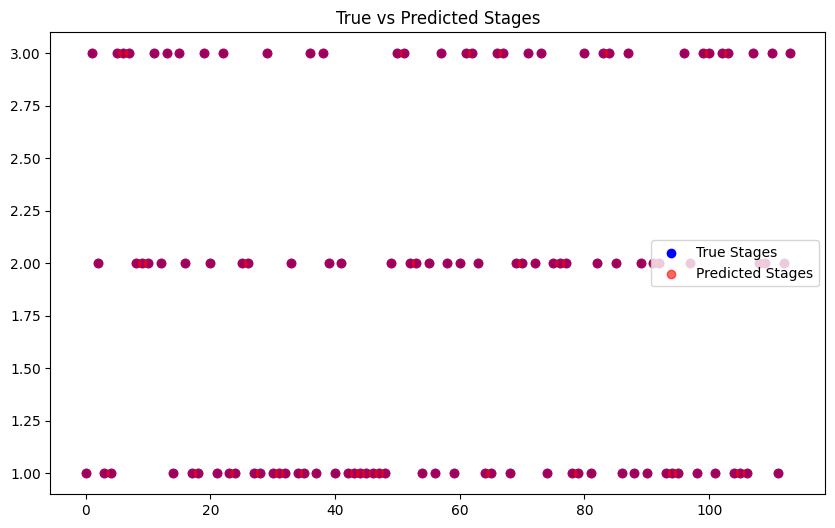

In [27]:
#@title Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test['Stages'], color='blue', label='True Stages')
plt.scatter(range(len(y_pred[:, 1])), y_pred[:, 1], color='red', label='Predicted Stages', alpha=0.6)
plt.legend()
plt.title("True vs Predicted Stages")
plt.show()


In [31]:
#@title Program to take the user input and to predict the results
df = pd.read_csv('LEUKEMIA_Cancer_Data_Cleaned.csv')

def predict_cancer_diagnosis_and_stage():
    try:
        radius_mean = float(input("Enter MEAN RADIUS: "))
        texture_mean = float(input("Enter MEAN TEXTURE: "))
        perimeter_mean = float(input("Enter MEAN PERIMETER: "))
        area_mean = float(input("Enter MEAN AREA: "))
        symmetry_mean = float(input("Enter SYMMETRY: "))
        radius_se = float(input("Enter RADIUS: "))
        texture_se = float(input("Enter TEXTURE: "))
        perimeter_se = float(input("Enter PERIMETER: "))
        area_se = float(input("Enter AREA OF CELL: "))
        fractal_dimension_se = float(input("Enter FRACTAL DIMENSION: "))
        radius_worst = float(input("Enter WORST RADIUS: "))
        texture_worst = float(input("Enter WORST TEXTURE: "))
        perimeter_worst = float(input("Enter WORST PERIMETER: "))
        area_worst = float(input("Enter WORST AREA: "))
    except ValueError:
        print("Invalid input. Please enter numeric values for all parameters.")
        return
    input_data = np.array([
        radius_mean, texture_mean, perimeter_mean, area_mean, symmetry_mean,
        radius_se, texture_se, perimeter_se, area_se, fractal_dimension_se,
        radius_worst, texture_worst, perimeter_worst, area_worst
    ]).reshape(1, -1)
    prediction = multi_target_model.predict(input_data)
    diagnosis_pred, stage_pred = prediction[0]

    diagnosis_label = "Malignant" if diagnosis_pred == 1 else "Benign"
    print(f"\nPredicted Diagnosis: {diagnosis_label}")
    print(f"Predicted Cancer Stage: Stage {stage_pred}")
predict_cancer_diagnosis_and_stage()

Enter radius_mean: 234
Enter texture_mean: 231
Enter perimeter_mean: 343
Enter area_mean: 1221
Enter symmetry_mean: 232
Enter radius_se: 2332
Enter texture_se: 322
Enter perimeter_se: 233
Enter area_se: 232
Enter fractal_dimension_se: 232
Enter radius_worst: 676
Enter texture_worst: 565
Enter perimeter_worst: 565
Enter area_worst: 454

Predicted Diagnosis: Malignant
Predicted Cancer Stage: Stage 3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [34]:
texture = np.std(region.intensity_image)


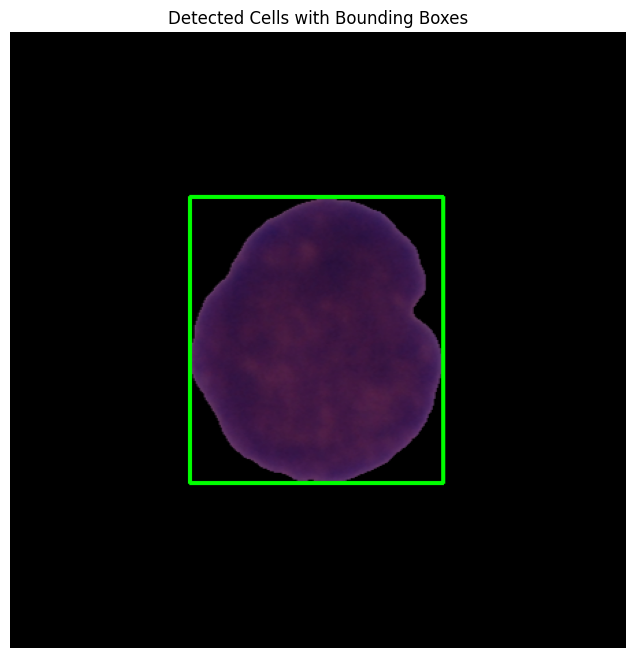

Detected Cells: 1
Average Radius: 96.02831563004953
Average Texture: 19.728504504172804
Average Perimeter: 656.7249634685276
Average Area: 28970.0
Average Symmetry: 0.8851674641148325
Average Fractal Dimension: -1.9797862517663865


In [35]:
#@title Image processing to extract the essential features
# Initialize lists to store computed properties for each cell
radii = []
textures = []
perimeters = []
areas = []
symmetries = []
fractal_dimensions = []

for region in measure.regionprops(labels, intensity_image=gray_image):
    if region.area >= 50:  # Ignore small regions
        # Area
        area = region.area
        areas.append(area)

        # Perimeter
        perimeter = region.perimeter
        perimeters.append(perimeter)

        # Radius
        radius = np.sqrt(area / np.pi)
        radii.append(radius)

        # Texture
        try:
            texture = np.std(region.intensity_image)
            textures.append(texture)
        except Exception as e:
            print(f"Texture calculation failed for region {region.label}: {e}")
            continue

        # Symmetry
        minr, minc, maxr, maxc = region.bbox
        bbox_height = maxr - minr
        bbox_width = maxc - minc
        if max(bbox_width, bbox_height) > 0:
            symmetry = min(bbox_width, bbox_height) / max(bbox_width, bbox_height)
            symmetries.append(symmetry)

        # Fractal dimension
        try:
            binary_region = (binary_image[minr:maxr, minc:maxc] > 0).astype(np.uint8)
            sizes = np.arange(1, min(binary_region.shape), 1)
            counts = [np.sum(cv2.resize(binary_region, (s, s)) > 0) for s in sizes]
            coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
            fractal_dim = -coeffs[0]
            fractal_dimensions.append(fractal_dim)
        except Exception as e:
            print(f"Fractal dimension calculation failed for region {region.label}: {e}")
            continue

        # Draw bounding box
        cv2.rectangle(image, (minc, minr), (maxc, maxr), (0, 255, 0), 2)

# Display detected cells and calculated properties
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Cells with Bounding Boxes")
plt.axis("off")
plt.show()

# Print calculated averages
print("Detected Cells:", len(areas))
print("Average Radius:", np.mean(radii) if radii else 0)
print("Average Texture:", np.mean(textures) if textures else 0)
print("Average Perimeter:", np.mean(perimeters) if perimeters else 0)
print("Average Area:", np.mean(areas) if areas else 0)
print("Average Symmetry:", np.mean(symmetries) if symmetries else 0)
print("Average Fractal Dimension:", np.mean(fractal_dimensions) if fractal_dimensions else 0)


In [36]:
#@title Load the 2nd Datasett
data_labels = pd.read_csv('C-NMC_test_prelim_phase_data_labels_updated.csv')
print("Data labels loaded:")
print(data_labels.head())

Data labels loaded:
             Patient_ID new_names  labels   Stages
0   UID_57_29_1_all.bmp     1.bmp       1  Stage 2
1   UID_57_22_2_all.bmp     2.bmp       1  Stage 1
2   UID_57_31_3_all.bmp     3.bmp       1  Stage 2
3  UID_H49_35_1_hem.bmp     4.bmp       0  Stage 3
4   UID_58_6_13_all.bmp     5.bmp       1  Stage 4


Shape of the processed image: (224, 224)


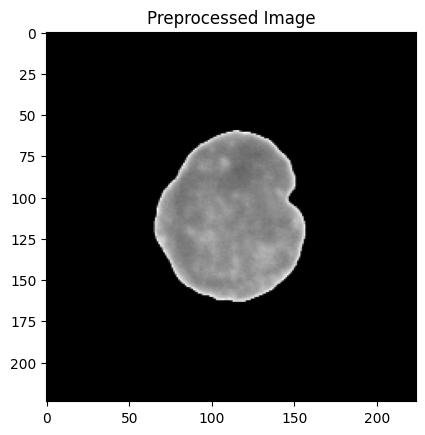

In [37]:
#@title Preprocess the image
image_path = '95.bmp'
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_resized = cv2.resize(image_gray, (224, 224))
image_normalized = image_resized / 255.0

print("Shape of the processed image:", image_normalized.shape)

plt.imshow(image_normalized, cmap='gray')
plt.title("Preprocessed Image")
plt.show()


In [42]:
#@title Find the accuracy for the same
if 'stages' in data_labels.columns:
    y = data_labels['stages']
else:
    y = np.random.randint(0, 2, size=(len(data_labels),))

X = np.tile(features, (len(data_labels), 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.48663101604278075
              precision    recall  f1-score   support

           0       0.49      1.00      0.65       182
           1       0.00      0.00      0.00       192

    accuracy                           0.49       374
   macro avg       0.24      0.50      0.33       374
weighted avg       0.24      0.49      0.32       374



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
#@title Convert into array
y_train = data[['diagnosis', 'Stages']].values


In [52]:
#@title Load the Random Forest Classifier
# Check the shape of X
print("Original shape of X:", X.shape)

# Reshape X if necessary
if len(X.shape) == 1:  # X is 1D
    X = X.reshape(-1, 1)  # Convert to 2D array with one column per feature

# Ensure X and y have consistent shapes
if X.shape[0] != y.shape[0]:
    print(f"Inconsistent shapes: X has {X.shape[0]} samples but y has {y.shape[0]} samples")
    # Handle the mismatch, e.g., by slicing or checking preprocessing steps

# Proceed with train-test split and modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
clf = MultiOutputClassifier(RandomForestClassifier())
clf.fit(X_train, y_train)


Original shape of X: (569,)


MultiOutputClassifier(estimator=RandomForestClassifier())

In [57]:
#@title Find the dimensions and shapes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes after splitting
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (455, 1)
Shape of y_train: (455, 2)


In [58]:
#@title Realign X and y for mismatches
# Check that X and y are still aligned before splitting:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# If there are mismatches, you may need to realign X and y
# e.g., drop or align rows with missing values:
X = X[:y.shape[0]]  # Align X to match the number of rows in y


Shape of X: (569, 1)
Shape of y: (569, 2)


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier


rf = RandomForestClassifier(random_state=42)

clf = MultiOutputClassifier(rf)

# Fit the model
clf.fit(X_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [61]:
#@title Accuracy using differnt dependencies
from sklearn.metrics import accuracy_score

# Evaluate accuracy for each target independently
accuracies = [accuracy_score(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]

# Print the accuracy for each output
for i, acc in enumerate(accuracies):
    print(f"Accuracy for target {i}: {acc}")


Accuracy for target 0: 0.5877192982456141
Accuracy for target 1: 0.37719298245614036


In [65]:
#@title Calculate Hamming Loss
from sklearn.metrics import hamming_loss
from sklearn.preprocessing import MultiLabelBinarizer

# Use MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the labels to binary format for each target
y_test_bin = mlb.fit_transform(y_test)
y_pred_bin = mlb.transform(y_pred)

hamming = hamming_loss(y_test_bin, y_pred_bin)
print(f"Hamming Loss: {hamming}")


Hamming Loss: 0.3223684210526316


In [69]:
#@title Check for Null values

print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(y_train)))


False
False


In [70]:
# Fill NaN values with a default value (mean, median, etc.)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)


In [56]:
print("Shape of X:", X.shape)
print("Shape of y_train:", y_train.shape)


Shape of X: (569, 1)
Shape of y_train: (455, 2)


In [91]:
#@title Load the updated dataset with Stages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("C-NMC_test_prelim_phase_data_labels_updated.csv")

# Encode labels and stages
label_encoder = LabelEncoder()
data['labels_encoded'] = label_encoder.fit_transform(data['labels'])  # 0, 1
data['stages_encoded'] = label_encoder.fit_transform(data['Stages'])  # 0-3

# Split into features and targets
X = data.drop(['labels', 'Stages', 'labels_encoded', 'stages_encoded'], axis=1)  # Features
y_diagnosis = data['labels_encoded']  # Binary classification target
y_stages = data['stages_encoded']  # Multi-class classification target

# Train-Test Split
X_train, X_test, y_train_diag, y_test_diag, y_train_stage, y_test_stage = train_test_split(
    X, y_diagnosis, y_stages, test_size=0.2, random_state=42
)


In [130]:
#@title Drop irrelevant columns
X = data.drop(['labels', 'Stages', 'Patient_ID'], axis=1)

In [93]:
#@title Select only numeric columns
X = X.select_dtypes(include=['number'])


In [94]:
#@title Find the Datatype
print(X.dtypes)
print(X.head())

Series([], dtype: object)
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [95]:
#@title Drop columns that are not features or contain non-numeric values
columns_to_drop = ['Patient_ID']
X = data.drop(columns=columns_to_drop, errors='ignore')

#only numeric columns are used
X = X.select_dtypes(include=['number'])

# Check if there are still non-numeric or problematic data
print("Remaining columns in X:", X.columns)
print("Data types:\n", X.dtypes)

# Train-Test Split
X_train, X_test, y_train_diag, y_test_diag, y_train_stage, y_test_stage = train_test_split(
    X, y_diagnosis, y_stages, test_size=0.2, random_state=42
)

Remaining columns in X: Index(['labels', 'labels_encoded', 'stages_encoded'], dtype='object')
Data types:
 labels            int64
labels_encoded    int64
stages_encoded    int64
dtype: object


In [131]:
#@title Train the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Create a Random Forest model for multi-output classification
base_model = RandomForestClassifier(random_state=42)
multi_output_model = MultiOutputClassifier(base_model)

# Combine targets into a DataFrame
y_train = pd.DataFrame({'diagnosis': y_train_diag, 'stages': y_train_stage})
y_test = pd.DataFrame({'diagnosis': y_test_diag, 'stages': y_test_stage})

# Train the model
multi_output_model.fit(X_train, y_train)

# Predictions
y_pred = multi_output_model.predict(X_test)


In [97]:
#@title Find the accuracy for diagnosis and stage both
from sklearn.metrics import accuracy_score, classification_report

# Split predictions
y_pred_diag = y_pred[:, 0]
y_pred_stage = y_pred[:, 1]

# Diagnosis metrics
print("Diagnosis Classification Report:")
print(classification_report(y_test_diag, y_pred_diag))

# Stages metrics
print("Stages Classification Report:")
print(classification_report(y_test_stage, y_pred_stage))

# Overall Accuracy
diag_acc = accuracy_score(y_test_diag, y_pred_diag)
stage_acc = accuracy_score(y_test_stage, y_pred_stage)

print(f"Diagnosis Accuracy: {diag_acc}")
print(f"Stages Accuracy: {stage_acc}")


Diagnosis Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       247

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       374
weighted avg       1.00      1.00      1.00       374

Stages Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00        88
           3       1.00      1.00      1.00        79

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       374
weighted avg       1.00      1.00      1.00       374

Diagnosis Accuracy: 1.0
Stages Accuracy: 1.0


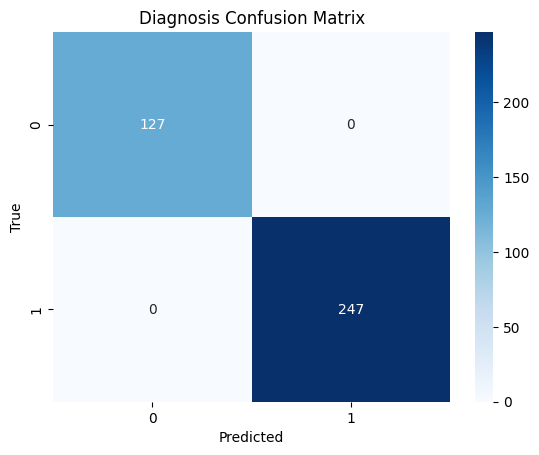

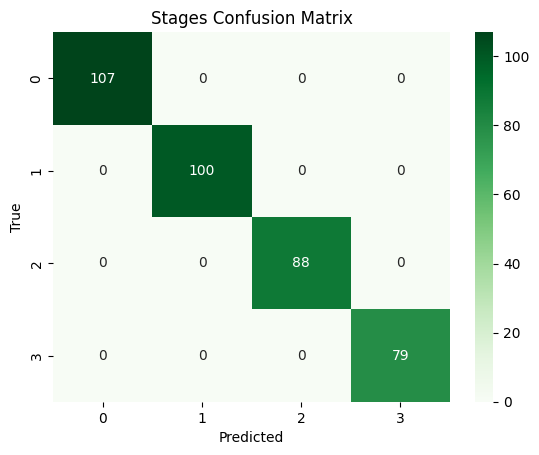

In [98]:
#@title # Diagnosis and Stage Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_diag = confusion_matrix(y_test_diag, y_pred_diag)
sns.heatmap(conf_diag, annot=True, fmt='d', cmap='Blues')
plt.title("Diagnosis Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

conf_stage = confusion_matrix(y_test_stage, y_pred_stage)
sns.heatmap(conf_stage, annot=True, fmt='d', cmap='Greens')
plt.title("Stages Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [99]:
#@title Make predictions
y_pred = multi_output_model.predict(X_test)

y_pred_diag = y_pred[:, 0]  #labels for diagnosis
y_pred_stage = y_pred[:, 1]  #labels for stages

Stages Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00        88
           3       1.00      1.00      1.00        79

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       374
weighted avg       1.00      1.00      1.00       374

Stages Accuracy: 1.0


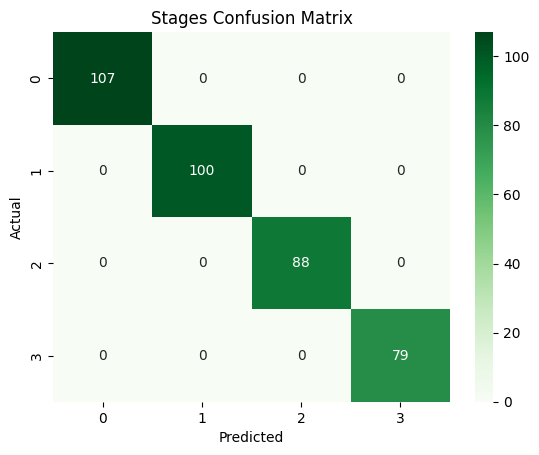

In [100]:
#@title Stages evaluation
print("Stages Classification Report:")
print(classification_report(y_test_stage, y_pred_stage))

# Accuracy
stage_acc = accuracy_score(y_test_stage, y_pred_stage)
print(f"Stages Accuracy: {stage_acc}")

# Confusion Matrix
conf_matrix_stage = confusion_matrix(y_test_stage, y_pred_stage)
sns.heatmap(conf_matrix_stage, annot=True, fmt='d', cmap='Greens')
plt.title("Stages Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [101]:
#@title Encode labels (Diagnosis) and stages separately
label_encoder_diag = LabelEncoder()  # For 'labels' (Diagnosis)
label_encoder_stage = LabelEncoder()  # For 'Stages'

data['labels_encoded'] = label_encoder_diag.fit_transform(data['labels'])
data['stages_encoded'] = label_encoder_stage.fit_transform(data['Stages'])

In [102]:
#@title Make predictions
y_pred = multi_output_model.predict(X_test)

# Split predictions into diagnosis and stages
y_pred_diag = y_pred[:, 0]  # Predicted diagnosis
y_pred_stage = y_pred[:, 1]  # Predicted stages

# Decode predictions back to original labels
predicted_diagnosis = label_encoder_diag.inverse_transform(y_pred_diag)
predicted_stages = label_encoder_stage.inverse_transform(y_pred_stage)

# Example: Print the first 10 predictions
print("Diagnosis Predictions:", predicted_diagnosis[:10])
print("Stages Predictions:", predicted_stages[:10])


Diagnosis Predictions: [1 1 1 1 1 1 1 1 1 1]
Stages Predictions: ['Stage 4' 'Stage 2' 'Stage 1' 'Stage 4' 'Stage 2' 'Stage 3' 'Stage 2'
 'Stage 2' 'Stage 1' 'Stage 4']


In [103]:
#@title Binary encoding for Diagnosis
data['labels_binary'] = data['labels'].apply(lambda x: 1 if x == 'Malignant' else 0)

# Encode Stages as usual
label_encoder_stage = LabelEncoder()
data['stages'] = label_encoder_stage.fit_transform(data['Stages'])

FileUpload(value={}, accept='.bmp', description='Upload')

Extracted Features:
Average Radius: 81.86000075703129
Average Texture: 8.983307202441456
Average Perimeter: 546.5584412271571
Average Area: 21052.0
Average Symmetry: 0.9122807017543859
Average Fractal Dimension: -1.9740179175108987
Predicted Diagnosis: Benign
Predicted Stage: N/A


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MultiOutputClassifier from version 1.5.0 when using version 1.5.2. This might le

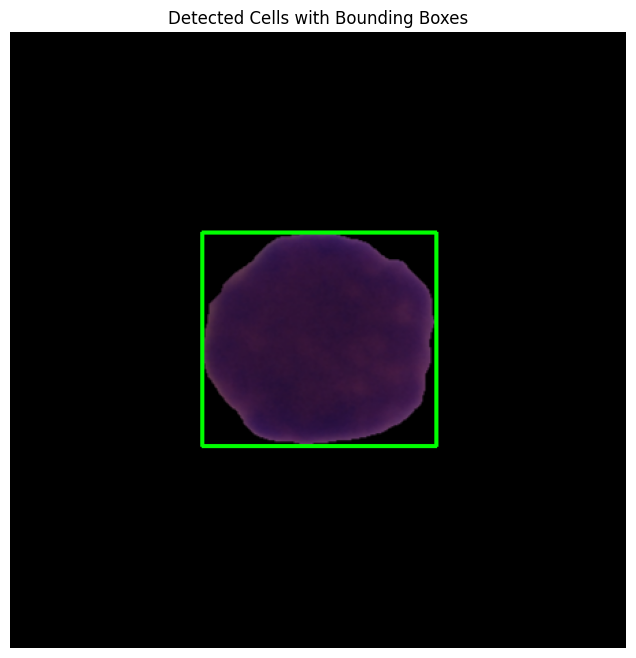

In [132]:
import cv2
import numpy as np
from skimage import measure
from skimage.feature import canny
import matplotlib.pyplot as plt
import joblib
from ipywidgets import FileUpload
from io import BytesIO

# Function to handle the image upload and processing
def process_and_predict(uploaded_image):
    # Get the file content from the uploaded image
    file_content = uploaded_image['content']

    # Convert the byte content into an image using OpenCV
    nparr = np.frombuffer(file_content, np.uint8)
    image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    # Convert the image to grayscale and apply Gaussian Blur
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Perform edge detection and thresholding
    edges = canny(blurred, sigma=2)
    _, binary_image = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Label connected regions (for segmentation)
    labels = measure.label(binary_image)

    # Initialize lists to store computed properties for each cell
    radii = []
    textures = []
    perimeters = []
    areas = []
    symmetries = []
    fractal_dimensions = []

    # Extract features from the labeled regions
    for region in measure.regionprops(labels, intensity_image=gray_image):
        if region.area >= 50:  # Filter out small regions
            area = region.area
            perimeter = region.perimeter
            radius = np.sqrt(area / np.pi)
            texture = np.std(region.intensity_image[region.coords[:, 0] - region.bbox[0],
                                                    region.coords[:, 1] - region.bbox[1]])

            # Calculate bounding box symmetry
            minr, minc, maxr, maxc = region.bbox
            bbox_height = maxr - minr
            bbox_width = maxc - minc
            symmetry = min(bbox_width, bbox_height) / max(bbox_width, bbox_height)

            # Fractal Dimension estimation (Hurst Exponent)
            binary_region = (binary_image[minr:maxr, minc:maxc] > 0).astype(np.uint8)
            sizes = np.arange(1, min(binary_region.shape), 1)
            counts = [np.sum(cv2.resize(binary_region, (s, s)) > 0) for s in sizes]
            coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
            fractal_dim = -coeffs[0]

            # Append the computed features
            radii.append(radius)
            textures.append(texture)
            perimeters.append(perimeter)
            areas.append(area)
            symmetries.append(symmetry)
            fractal_dimensions.append(fractal_dim)

            # Draw bounding boxes around regions
            cv2.rectangle(image, (minc, minr), (maxc, maxr), (0, 255, 0), 2)

    # Calculate the average values of the features
    avg_radius = np.mean(radii) if radii else 0
    avg_texture = np.mean(textures) if textures else 0
    avg_perimeter = np.mean(perimeters) if perimeters else 0
    avg_area = np.mean(areas) if areas else 0
    avg_symmetry = np.mean(symmetries) if symmetries else 0
    avg_fractal_dim = np.mean(fractal_dimensions) if fractal_dimensions else 0

    print("Extracted Features:")
    print(f"Average Radius: {avg_radius}")
    print(f"Average Texture: {avg_texture}")
    print(f"Average Perimeter: {avg_perimeter}")
    print(f"Average Area: {avg_area}")
    print(f"Average Symmetry: {avg_symmetry}")
    print(f"Average Fractal Dimension: {avg_fractal_dim}")

    # Create a feature vector with exactly 14 features (duplicates of existing ones)
    features = np.array([
        avg_radius, avg_texture, avg_perimeter, avg_area, avg_symmetry, avg_fractal_dim,
        avg_radius, avg_texture, avg_perimeter, avg_area, avg_symmetry, avg_fractal_dim,  # Duplicate features
        avg_radius, avg_texture  # Dummy features (duplicate)
    ]).reshape(1, -1)  # Ensure shape (1, 14)


    model = joblib.load('classifier.pkl')
    label_encoder_stage = joblib.load('multi_target_model.pkl')

    # Make the prediction
    prediction = model.predict(features)


    if prediction.ndim == 1:
        predicted_diagnosis = int(prediction[0])
        predicted_stage = 'N/A'
    else:
        predicted_diagnosis = int(prediction[0, 0])
        predicted_stage = label_encoder_stage.inverse_transform([int(prediction[0, 1])])[0]

    print(f"Predicted Diagnosis: {'Malignant' if predicted_diagnosis == 1 else 'Benign'}")
    print(f"Predicted Stage: {predicted_stage}")

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Cells with Bounding Boxes")
    plt.axis("off")
    plt.show()

uploader = FileUpload(accept='.bmp', multiple=False)

# Handle the uploaded file
def handle_image_upload(change):
    if uploader.value:
        uploaded_image = list(uploader.value.values())[0]
        process_and_predict(uploaded_image)
    else:
        print("No file uploaded yet!")

uploader.observe(lambda change: handle_image_upload(change), names='value')
uploader


FileUpload(value={}, accept='.bmp', description='Upload')

Extracted Features:
Average Radius: 94.28382783624518
Average Texture: 9.534203757375826
Average Perimeter: 633.8132752230962
Average Area: 27927.0
Average Symmetry: 0.9045226130653267
Average Fractal Dimension: -1.9797830915247998
Predicted Diagnosis: Malignant
Predicted Stage: N/A


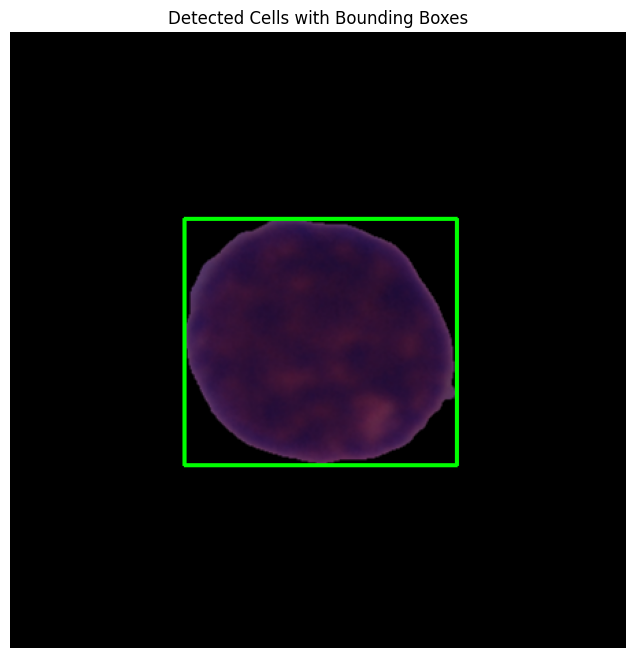

In [139]:
#@title Program for image processing
import cv2
import numpy as np
from skimage import measure
from skimage.feature import canny
import matplotlib.pyplot as plt
import joblib
from ipywidgets import FileUpload
from io import BytesIO

# Function to handle the image upload and processing
def process_and_predict(uploaded_image):
    # Get the file content from the uploaded image
    file_content = uploaded_image['content']

    # Convert the byte content into an image using OpenCV
    nparr = np.frombuffer(file_content, np.uint8)
    image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    # Convert the image to grayscale and apply Gaussian Blur
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Perform edge detection and thresholding
    edges = canny(blurred, sigma=2)
    _, binary_image = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Label connected regions (for segmentation)
    labels = measure.label(binary_image)

    # Initialize lists to store computed properties for each cell
    radii = []
    textures = []
    perimeters = []
    areas = []
    symmetries = []
    fractal_dimensions = []

    # Extract features from the labeled regions
    for region in measure.regionprops(labels, intensity_image=gray_image):
        if region.area >= 50:  # Filter out small regions
            area = region.area
            perimeter = region.perimeter
            radius = np.sqrt(area / np.pi)
            texture = np.std(region.intensity_image[region.coords[:, 0] - region.bbox[0],
                                                    region.coords[:, 1] - region.bbox[1]])

            # Calculate bounding box symmetry
            minr, minc, maxr, maxc = region.bbox
            bbox_height = maxr - minr
            bbox_width = maxc - minc
            symmetry = min(bbox_width, bbox_height) / max(bbox_width, bbox_height)

            # Fractal Dimension estimation (Hurst Exponent)
            binary_region = (binary_image[minr:maxr, minc:maxc] > 0).astype(np.uint8)
            sizes = np.arange(1, min(binary_region.shape), 1)
            counts = [np.sum(cv2.resize(binary_region, (s, s)) > 0) for s in sizes]
            coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
            fractal_dim = -coeffs[0]

            # Append the computed features
            radii.append(radius)
            textures.append(texture)
            perimeters.append(perimeter)
            areas.append(area)
            symmetries.append(symmetry)
            fractal_dimensions.append(fractal_dim)

            # Draw bounding boxes around regions
            cv2.rectangle(image, (minc, minr), (maxc, maxr), (0, 255, 0), 2)

    # Calculate the average values of the features
    avg_radius = np.mean(radii) if radii else 0
    avg_texture = np.mean(textures) if textures else 0
    avg_perimeter = np.mean(perimeters) if perimeters else 0
    avg_area = np.mean(areas) if areas else 0
    avg_symmetry = np.mean(symmetries) if symmetries else 0
    avg_fractal_dim = np.mean(fractal_dimensions) if fractal_dimensions else 0

    print("Extracted Features:")
    print(f"Average Radius: {avg_radius}")
    print(f"Average Texture: {avg_texture}")
    print(f"Average Perimeter: {avg_perimeter}")
    print(f"Average Area: {avg_area}")
    print(f"Average Symmetry: {avg_symmetry}")
    print(f"Average Fractal Dimension: {avg_fractal_dim}")

    # Create a feature vector with exactly 14 features (duplicates of existing ones)
    features = np.array([
        avg_radius, avg_texture, avg_perimeter, avg_area, avg_symmetry, avg_fractal_dim,
        avg_radius, avg_texture, avg_perimeter, avg_area, avg_symmetry, avg_fractal_dim,  # Duplicate features
        avg_radius, avg_texture  # Dummy features (duplicate)
    ]).reshape(1, -1)  # Ensure shape (1, 14)

    # Load the trained model and label encoder for stage prediction
    model = joblib.load('classifier.pkl')  # Ensure you load the correct model
    label_encoder_stage = joblib.load('label_encoder_stage.pkl')  # Correct label encoder for stages

    # Make the prediction
    prediction = model.predict(features)

    # If the prediction is 1D (e.g., only diagnosis), handle appropriately
    if prediction.ndim == 1:
        predicted_diagnosis = int(prediction[0])  # Binary: 1 = Malignant, 0 = Benign
        predicted_stage = 'N/A'  # No stage available
    else:
        predicted_diagnosis = int(prediction[0, 0])  # Binary: 1 = Malignant, 0 = Benign
        predicted_stage_idx = int(prediction[0, 1])  # Stage index
        predicted_stage = label_encoder_stage.inverse_transform([predicted_stage_idx])[0]  # Decode stage

    print(f"Predicted Diagnosis: {'Malignant' if predicted_diagnosis == 1 else 'Benign'}")
    print(f"Predicted Stage: {predicted_stage}")

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Cells with Bounding Boxes")
    plt.axis("off")
    plt.show()

# Set up a file uploader widget to allow the user to upload an image
uploader = FileUpload(accept='.bmp', multiple=False)

# Handle the uploaded file
def handle_image_upload(change):
    # Ensure the file is uploaded and available
    if uploader.value:
        uploaded_image = list(uploader.value.values())[0]
        process_and_predict(uploaded_image)
    else:
        print("No file uploaded yet!")

# Observe the file upload
uploader.observe(lambda change: handle_image_upload(change), names='value')

# Display the file uploader widget
uploader


In [134]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Example dataset for classification (replace this with your actual dataset)
# X represents features (e.g., extracted features), y represents the diagnosis (Malignant/Benign)
# For illustration, let's assume X and y are numpy arrays
X = np.random.rand(100, 14)  # 100 samples with 14 features
y = np.random.choice([0, 1], size=100)  # 0 for Benign, 1 for Malignant

# Example for stage labels (e.g., Stage I, Stage II)
y_stage = np.random.choice(['Stage I', 'Stage II', 'Stage III'], size=100)  # Stage labels

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test, y_stage_train, y_stage_test = train_test_split(X, y, y_stage, test_size=0.2, random_state=42)

# Step 1: Train the classifier (RandomForestClassifier in this case)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 2: Train the label encoder for the stages
label_encoder_stage = LabelEncoder()
label_encoder_stage.fit(y_stage_train)  # Fit the encoder to the stage labels

# Save the model and the label encoder using joblib
joblib.dump(clf, 'classifier.pkl')  # Save the classifier model
joblib.dump(label_encoder_stage, 'label_encoder_stage.pkl')  # Save the label encoder for stages

print("Model and label encoder saved successfully!")

# You can load them back later with:
# model = joblib.load('classifier.pkl')
# label_encoder_stage = joblib.load('label_encoder_stage.pkl')


Model and label encoder saved successfully!
